<a href="https://colab.research.google.com/github/PabloCaSan/Portfolio/blob/main/Proyecto_2_PrecioDeCasas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis exploratorio y predicción del precio de las casas

Los datos que se utilizarán son acerca del precio al que se han vendido casas, de acuerdo al número de pisos, año de construcción, superficie total, etc. La descripción de cada variable se encuentra en el enlace de [Kaggle](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/data).

## Preparación inicial

In [1]:
# Importamos la paquetería que usaremos en este proyecto

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Esta notebook está hecha en Colab para simplificar el proceso de instalar librerías a la computadora, así que primero hay que conectar con Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Una vez que se conecta, hay que navegar a donde están ubicados los archivos. Para esta notebook se descargaron archivos de [Kaggle](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/data) y se subieron a Google Drive con el nombre "Casas.csv"

In [3]:
%cd /content/drive/MyDrive/Portafolio
!ls

/content/drive/MyDrive/Portafolio
 API_AG.LND.AGRI.K2_DS2_en_csv_v2_3472200.csv
 API_AG.LND.FRST.K2_DS2_en_csv_v2_3470755.csv
 API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3605664.csv
 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3470002.csv
 API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv
 Casas.csv
 Credenciales.png
 GlobalLandTemperaturesByCountry.csv
 GlobalTemperatures.csv
 IBM2.png
 IBM.png
 population_total_long.csv
'Proyecto 1 - Portafolio.ipynb'
'Proyecto 2 - Portafolio.ipynb'
 RN_DeteccionNumeros.ipynb
'SQL_en _Python.ipynb'
 Tarjetas.csv
 Untitled0.ipynb


Ahora hay que leer el archivo desde la notebook

In [4]:
pd.read_csv('Casas.csv')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Es conveniente guardar esta línea en una variable

In [5]:
df = pd.read_csv('Casas.csv')

Una vez que se tiene la tabla hay que observar de qué está compuesta

In [6]:
df.shape

(1460, 81)

El resultado anterior muestra cuántos renglones y cuántas columnas hay en la tabla

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

La lista anterior contiene los nombres, el tipo de variable y si hay variables nulas, de cada una de las columnas que componen la tabla de datos

Ahora busquemos si hay datos faltantes o incompletos

In [8]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


Se observa que hay variables con datos faltantes. Hagamos un recuento de datos faltantes

In [9]:
total = df.isnull().sum().sort_values(ascending=False) #Suma la cantidad de datos nulos por variable y las ordena de mayor a menor
porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #Saca el porcentaje de datos nulos por variable y las ordena de mayor a menor 
faltante = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje']) #Une las dos tablas anteriores (total y porcentaje) en una tabla
faltante.head(20) #Muestra los primeros 20 valores, saldrán las variables con más datos nulos

,Total,Porcentaje
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Se observa que hay variables que ¡prácticamente tienen solo datos nulos!. En un caso real habría que tratar de consiguir los datos, o bien, determinar la cantidad porcentual del mínimo de datos que queremos.

En este caso elegiremos borrar todas las variables (me atrevo a hacer esto porque sé que estas variables no tienen impacto en el precio de venta).

In [10]:
df = df.drop((faltante[faltante['Total'] > 0]).index,1) #Borra las variables con por lo menos un dato faltante
df.isnull().sum().max() #Revisa que no queden datos faltantes

0

##Encontrando correlaciones entre variables

Una forma rápida de obtener correlaciones es con un mapa de calor

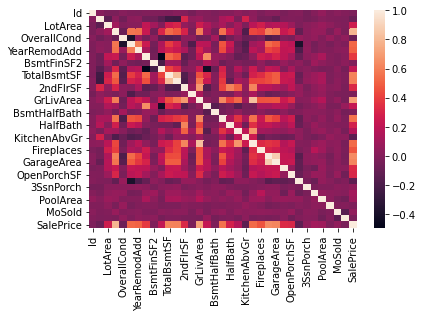

In [11]:
correlaciones = df.corr()
sns.heatmap(correlaciones)

Esto arroja mucha información sobre las variables que están correlacionadas entre sí, sin embargo, la variable que más nos interesa analizar es 'SalePrice', así que filtremos la matriz de correlaciones para mostrar solo esa variable

In [12]:
correlacionesSP = correlaciones[['SalePrice']]
correlacionesSP

,SalePrice
Id,-0.021917
MSSubClass,-0.084284
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378
BsmtUnfSF,0.214479


Ahora, nos interesa ver qué es lo que más contribuye (se correlaciona) al precio de venta de una casa, así que mostremos solo los valores mayores a 0.5

In [13]:
correlacionesSP2 = correlacionesSP.loc[correlacionesSP['SalePrice']>0.5]
correlacionesSP2.sort_values(by='SalePrice',ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [14]:
correlacionesSP2.T.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

De donde descubrimos que lo que más contribuye al precio de venta es lo siguiente:

1.   La calidad general de la casa
2.   Pies cuadrados de superficie habitable sobre el nivel del suelo
3.   Tamaño del garage en cantidad de coches que caben
4.   Tamaño del garage en pies cuadrados
5.   Tamaño del sótano en pies cuadrados
6.   Tamaño del primer piso en pies cuadrados
7.   Número de baños completos sobre nivel del suelo
8.   Número de cuartos sobre nivel del suelo
9.   Año en que se contruyó
10.  Año en que se remodeló


**Nota:** La lista anterior está ordenada de lo que más contribuye a lo que menos contribuye.

Ahora busquemos si hay alguna correlación inversa

In [15]:
correlacionesSP2 = correlacionesSP.loc[correlacionesSP['SalePrice']<-0.5]
correlacionesSP2.sort_values(by='SalePrice',ascending=False)

,SalePrice


Resulta que no hay

##Análisis estadístico del precio de venta


La variable "SalePrice" (precio de venta) es una variable tipo entero, así se le pueden aplicar funciones estadísticas para encontrar detalles que podrían ser interesantes

In [16]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

El resultado anterior se lee como sigue:


*   *count* = cantidad total de datos
*   *mean* = valor promedio
*   *std* = desviación estándar
*   *min* = valor mínimo
*   *25%* = percentil 25 (valor bajo el cual se encuentra el 25% de los datos)
*   *50%* = mediana
*   *75* = percentil 75 (valor bajo el cual se encuentra el 75% de los datos)




Ahora resulta interesante ver cómo es la distribución de precios de venta, para ello se puede crear un histograma

In [17]:
df['SalePrice'].mode() #Se calcula a parte, porque si se pone como el promedio y mediana en la gráfica anterior, da error

0    140000
dtype: int64

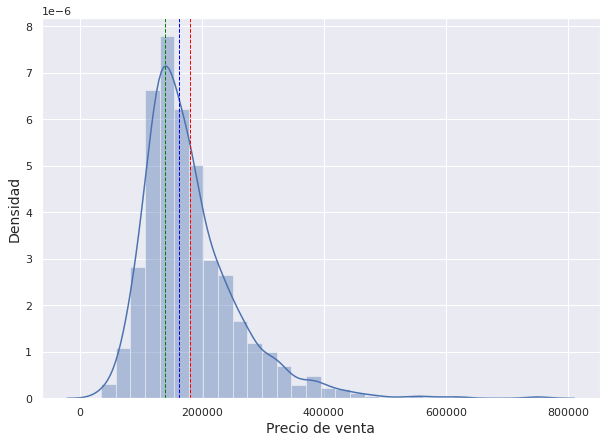

In [18]:
sns.set(rc={'figure.figsize':(10,7)}) #Esta función sirve para cambiar el tamaño de la figura
sns.distplot(df['SalePrice'], bins=30) #Se hace el histograma de la variable "SalePrice" usando Seaborn
plt.xlabel("Precio de venta", size=14)
plt.ylabel("Densidad", size=14)
plt.axvline(x=df['SalePrice'].mean(), color='red',ls='--', lw=1) #Muestra una línea correspondiente al promedio
plt.axvline(x=df['SalePrice'].median(), color='blue',ls='--', lw=1) #Muestra una línea correspondiente a la mediana
plt.axvline(x=140000, color='green',ls='--', lw=1) #Muestra una línea correspondiente a la moda

In [19]:
print("Skewness: %f" % df['SalePrice'].skew()) #Muestra la asimetría
print("Kurtosis: %f" % df['SalePrice'].kurt()) #Muestra la curtosis

Skewness: 1.882876
Kurtosis: 6.536282


De modo que la distribución tiene una asimetría positiva, pero no es simétrica.

La curtosis dice que la distribución es leptocúrtica (g>3), es decir que existe una gran concentración de los valores en torno a su media.

Como la distribución no es simétrica, no se trata de una distribución normal. Hagamos un ajuste normal para demostrarlo más claramente

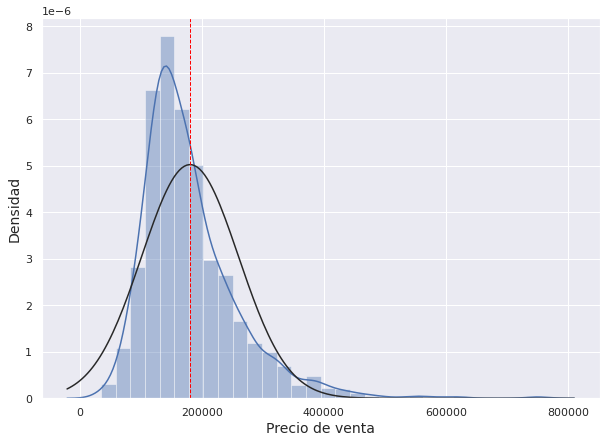

In [20]:
sns.distplot(df['SalePrice'], bins=30, fit=norm)
plt.xlabel("Precio de venta", size=14)
plt.ylabel("Densidad", size=14)
plt.axvline(x=df['SalePrice'].mean(), color='red',ls='--', lw=1) #Muestra una línea correspondiente al promedio

Esto podría ser un problema, ya que muchas pruebas estadísticas funcionan solo con distribuciones normales. Sin embargo, hay un truco que se puede usar para solucionar esto: hacer una transformación logarítmica

In [21]:
df['SalePrice'] = np.log(df['SalePrice']) #Se hace la transformación logarítmica

In [22]:
df['SalePrice'].mode()

0    11.849398
dtype: float64

In [23]:
std3 = df['SalePrice'].mean()+3*(df['SalePrice'].std())
std3

13.222406505892867

In [24]:
std3m = df['SalePrice'].mean()-3*(df['SalePrice'].std())
std3m

10.825695296325879

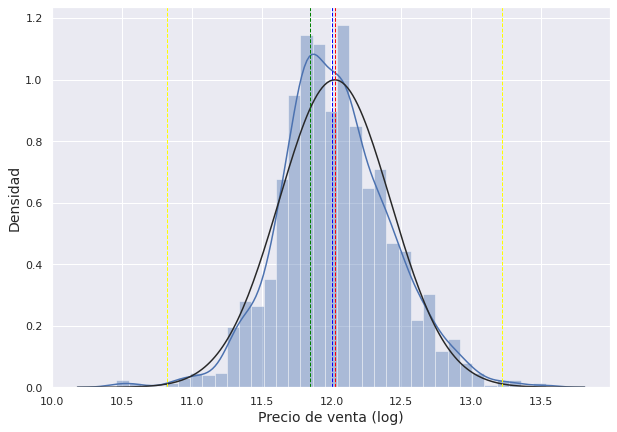

In [25]:
sns.distplot(df['SalePrice'], fit=norm)
plt.xlabel("Precio de venta (log)", size=14)
plt.ylabel("Densidad", size=14)
plt.axvline(x=df['SalePrice'].mean(), color='red',ls='--', lw=1) #Muestra una línea correspondiente al promedio
plt.axvline(x=df['SalePrice'].median(), color='blue',ls='--', lw=1) #Muestra una línea correspondiente a la mediana
plt.axvline(x=11.849398, color='green',ls='--', lw=1) #Muestra una línea correspondiente a la moda
plt.axvline(x=std3m, color='yellow',ls='--', lw=1) #Muestra una línea correspondiente a menos tres desviaciones estándar
plt.axvline(x=std3, color='yellow',ls='--', lw=1) #Muestra una línea correspondiente a tres desviaciones estándar

Se aprecia que se acerca más a la distribución normal. Para comprobar qué tanto se aproxima se puede hacer una gráfica de probabilidad normal. Este tipo de gráfica compara los datos observados, contra los datos que se obtienen de forma teórica (de acuerdo a la distribución normal). En una distribución normal perfecta, los puntos caerían en la línea recta

Text(0, 0.5, 'Valores observados')

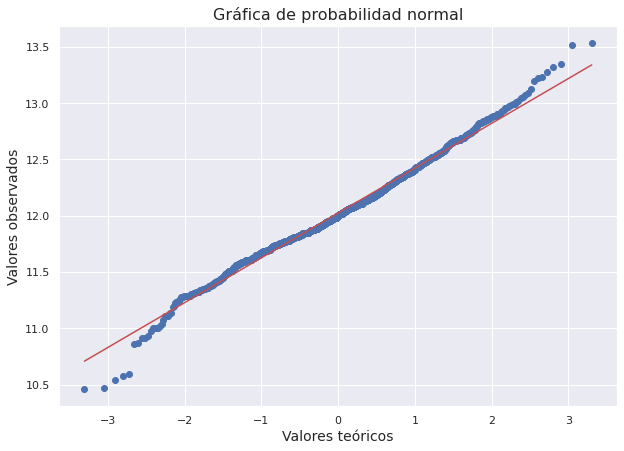

In [26]:
grafica_prob = stats.probplot(df['SalePrice'], plot=plt)
plt.title("Gráfica de probabilidad normal", size=16)
plt.xlabel("Valores teóricos", size=14)
plt.ylabel("Valores observados", size=14)

Se observa una mayor variabilidad en los extremos, pero se ajusta suficientemente bien para tratarla como si fuera normal

## Conclusiones del análisis de datos

Los datos de correlaciones fueron muy interesantes, quién pensaría que el tamaño del garage impacta más en el precio de la cada que el año en que fue construida. Recordemos los descubrimientos:

Lo que más contribuye al precio de venta de la casa en orden descendente:

1.   La calidad general de la casa
2.   Pies cuadrados de superficie habitable sobre el nivel del suelo
3.   Tamaño del garage en cantidad de coches que caben
4.   Tamaño del garage en pies cuadrados
5.   Tamaño del sótano en pies cuadrados
6.   Tamaño del primer piso en pies cuadrados
7.   Número de baños completos sobre nivel del suelo
8.   Número de cuartos sobre nivel del suelo
9.   Año en que se contruyó
10.  Año en que se remodeló

La distribución fue ajustada logarítmicamente para conveniencia en los modelos estadísticos que se pudieran necesitar más adelante.


## Machine Learning

Se pueden aplicar modelos de machine learning para obtener predicciones. En este caso conviene usar un modelo de regresión lineal múltiple

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Se carga nuevamente el dataframe, ya que no es necesario que tenga la transformación logarítmica

In [28]:
df_train = pd.read_csv('Casas.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Se eligen la columnas relevantes, es decir, las que se encontró que tienen una correlación con el precio de venta de la casa

In [29]:
df_relevant = df_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
df_relevant.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,8,2,548
1,6,1976,1976,1262,1262,1262,2,6,2,460
2,7,2001,2002,920,920,1786,2,6,2,608
3,7,1915,1970,756,961,1717,1,7,3,642
4,8,2000,2000,1145,1145,2198,2,9,3,836


Se separan los datos por variables dependientes e independientes

In [30]:
x = df_relevant.values
y = df_train['SalePrice'].values

Se separan los datos para entrear y para probar el modelo

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

Se aplica el modelo

In [32]:
regresion = LinearRegression()
regresion.fit(x_train, y_train)

LinearRegression()

Ahora se pueden hacer predicciones. Por conveniencia, se pasa de arreglo de NumPy a dataframe de Pandas, y luego se escoge un renglón aleatorio

In [33]:
test_array = pd.DataFrame(x_test, columns = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'])
test_array.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,6,1957,1975,2035,2515,2515,3,9,2,484
1,6,1941,1950,806,958,1578,1,5,1,240
2,5,1950,1950,709,979,1203,1,5,1,352
3,7,1977,1977,1160,1156,2022,2,8,2,505
4,6,1971,1971,525,525,1092,1,6,1,264


In [34]:
casa_aleatoria = test_array.sample(1)
casa_aleatoria

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
262,5,1954,1954,1050,1050,1795,2,7,1,352


Y se predice cuál será el precio de venta

In [35]:
print('Precio de venta predicho: ', regresion.predict(casa_aleatoria))

Precio de venta predicho:  [151383.55266862]


También es importante ver qué tan buena es la predicción

In [36]:
print('La precisión es del ',regresion.score(x_test, y_test), '%')

La precisión es del  0.677298503538523 %
